## a)

In [40]:
#Bütikofer Kevin, Charles-Lewis Jaggi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
data_train = pd.read_csv("student-dataset-train.csv", names = ["x1","x2","y"])


x1_train = data_train["x1"].values
x2_train = data_train["x2"].values
y_train = data_train["y"].values

N = len(x1_train)
x_bias = np.ones((N,1))
x1_train = np.reshape(x1_train,(N,1))
x2_train = np.reshape(x2_train,(N,1))
x1_2_train = np.square(x1_train)
x2_2_train = np.square(x2_train)
x1_x2_train = x1_train * x2_train


X = np.c_[x_bias,x1_train, x2_train,x1_2_train,x2_2_train,x1_x2_train]

print("shape X : ",np.shape(X))
print("shape y : ",np.shape(y_train))

shape X :  (100, 6)
shape y :  (100,)


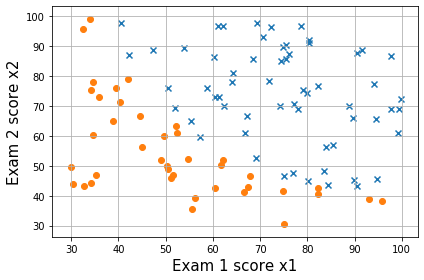

In [41]:
fig, ax = plt.subplots()
passed = np.array([X[i,(1,2)] for i in range(N) if y_train[i] == 1])
failed = np.array([X[i,(1,2)] for i in range(N) if y_train[i] == 0])

ax.scatter(passed[:,0], passed[:,1], marker='x')
ax.scatter(failed[:,0], failed[:,1], marker='o')

ax.set_xlabel('Exam 1 score x1', fontsize=15)
ax.set_ylabel('Exam 2 score x2', fontsize=15)

ax.grid(True)
fig.tight_layout()

plt.show()

## b)

In [42]:
m_x1 = np.mean(x1_train)
m_x2 = np.mean(x2_train)
m_x1_2 = np.mean(x1_2_train)
m_x2_2 = np.mean(x2_2_train)
m_x1_x2 = np.mean(x1_x2_train)

var_x1 = np.std(x1_train)
var_x2 = np.std(x2_train)
var_x1_2 = np.std(x1_2_train)
var_x2_2 = np.std(x2_2_train)
var_x1_x2 = np.std(x1_x2_train)

X_norm = np.copy(X)
X_norm[:,1] = (X[:,1]- m_x1)/ var_x1
X_norm[:,2] = (X[:,2]- m_x2)/ var_x2
X_norm[:,3] = (X[:,3]- m_x1_2)/ var_x1_2
X_norm[:,4] = (X[:,4]- m_x2_2)/ var_x2_2
X_norm[:,5] = (X[:,5]- m_x1_x2)/ var_x1_x2

## c)

In [43]:
sigmoid = lambda z: 1/(1+ np.exp(-z)) 

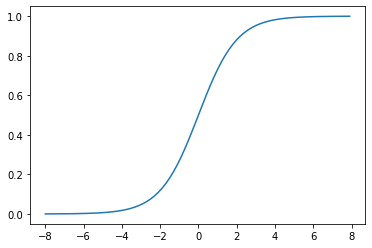

In [44]:
z = np.arange(-8., 8., 0.1)

plt.plot(z, sigmoid(z))

## d)

In [45]:
hypothesis = lambda X,thetas : sigmoid(np.dot(X,thetas))

## e)

In [46]:
 j_theta = lambda N,y,thetas,h : 1/N * np.sum(y*np.log(h) + (1-y)*np.log(1-h))

## f)

In [47]:
def gradientAscent(X, y, learning_rate, nb_epoch):
    N = X.shape[0] #taille des données
    D = X.shape[1] # dimension
    thetas = np.zeros(D)
    J = np.zeros(nb_epoch)
    for i in range(nb_epoch):
        h = hypothesis(X, thetas)
        J[i] = j_theta(N,y,thetas,h)
        loss = y - h
        gradient = loss.dot(X)
        thetas = thetas + learning_rate * (1.0/N) * gradient
    return J, thetas

## g)

[ 6.33022582  4.27209402  3.31316631 -4.28195447 -2.95792198 13.07599888]


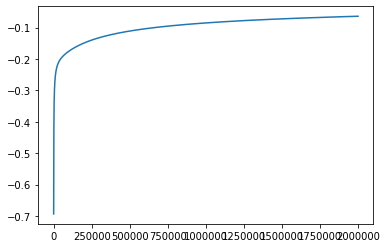

In [48]:
alpha = 0.001
nb_epoch = 2000000
J_norm, thetas_norm = gradientAscent(X_norm, y_train, alpha, nb_epoch)
print (thetas_norm)
plt.plot(J_norm)

## h)

In [49]:
data_test = pd.read_csv("student-dataset-test.csv", names = ["x1","x2","y"])


x1_test = data_test["x1"].values
x2_test = data_test["x2"].values
y_test = data_test["y"].values

N = len(x1_test)
x_bias = np.ones((N,1))
x1_test = np.reshape(x1_test,(N,1))
x2_test = np.reshape(x2_test,(N,1))
x1_2_test = np.square(x1_test)
x2_2_test = np.square(x2_test)
x1_x2_test = x1_test * x2_test

X_test = np.c_[x_bias,x1_test, x2_test,x1_2_test,x2_2_test,x1_x2_test]


In [50]:
m_x1_test = np.mean(x1_test)
m_x2_test = np.mean(x2_test)
m_x1_2_test = np.mean(x1_2_test)
m_x2_2_test = np.mean(x2_2_test)
m_x1_x2_test = np.mean(x1_x2_test)

var_x1_test = np.std(x1_test)
var_x2_test = np.std(x2_test)
var_x1_2_test = np.std(x1_2_test)
var_x2_2_test = np.std(x2_2_test)
var_x1_x2_test = np.std(x1_x2_test)

X_norm_test = np.copy(X_test)
X_norm_test[:,1] = (X_test[:,1]- m_x1_test)/ var_x1_test
X_norm_test[:,2] = (X_test[:,2]- m_x2_test)/ var_x2_test
X_norm_test[:,3] = (X_test[:,3]- m_x1_2_test)/ var_x1_2_test
X_norm_test[:,4] = (X_test[:,4]- m_x2_2_test)/ var_x2_2_test
X_norm_test[:,5] = (X_test[:,5]- m_x1_x2_test)/ var_x1_x2_test

In [53]:
h_norm_test = hypothesis(X_norm_test,thetas_norm)

h_res_norm = h_norm_test >= 0.5
correct = np.sum(h_res_norm == y_test)
print("correct : ",correct, " %")
print("rate : " , correct/N)

correct :  92  %
rate :  0.92


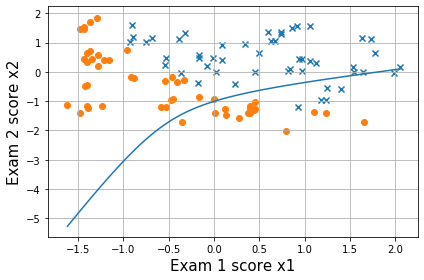

In [62]:
fig, ax = plt.subplots()
passed = np.array([X_norm_test[i,(1,2)] for i in range(N) if y_test[i] == 1])
failed = np.array([X_norm_test[i,(1,2)] for i in range(N) if y_test[i] == 0])

ax.scatter(passed[:,0], passed[:,1], marker='x')
ax.scatter(failed[:,0], failed[:,1], marker='o')

x1 = np.linspace(np.min(X_norm_test[:,1]), np.max(X_norm_test[:,1]), 100)
c = thetas_norm[0] + thetas_norm[1]*x1 + thetas_norm[3]*(x1**2)
b = thetas_norm[2] + thetas_norm[5] * x1
a = thetas_norm[4]

x2 = (-b + (np.sqrt(b**2 -4*a*c)))/(2*a)
plt.plot(x1, x2)


ax.set_xlabel('Exam 1 score x1', fontsize=15)
ax.set_ylabel('Exam 2 score x2', fontsize=15)

ax.grid(True)
fig.tight_layout()

plt.show()

## h)

## Using SciKit Learn

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

clf = LogisticRegression(solver='liblinear', max_iter=2000000).fit(X_norm, y_train)
y_pred_sklearn = clf.predict(X_norm_test)
print("accuracy_score: ", accuracy_score(y_test, y_pred_sklearn))
parameters = clf.coef_[0]
print(parameters)

accuracy_score:  0.9
[0.47300306 2.25852447 2.06417755]


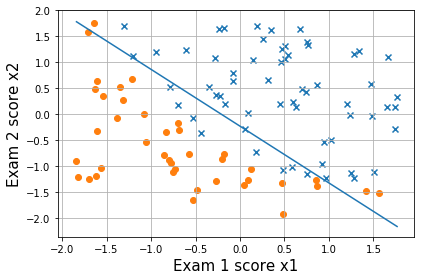

In [109]:
fig, ax = plt.subplots()

ax.scatter(passed[:,0], passed[:,1], marker='x')
ax.scatter(failed[:,0], failed[:,1], marker='o')

x1 = np.linspace(np.min(X_norm[:,1]), np.max(X_norm[:,1]), 100)
x2 = (-parameters[0] - parameters[1]*x1)/parameters[2]
plt.plot(x1, x2)


ax.set_xlabel('Exam 1 score x1', fontsize=15)
ax.set_ylabel('Exam 2 score x2', fontsize=15)

ax.grid(True)
fig.tight_layout()

plt.show()